# SI 370 - Visualization I

## Visualization for Data Scientists

We're going to ask a special virtual guest lecturer to provide some background on data visualization.  Together, we'll watch [a brief (8-video) by Dr. Chris Brooks](
https://www.coursera.org/learn/python-plotting/lecture/qrqqa/tools-for-thinking-about-design-alberto-cairo)
and pause it several times to answer the following questions:



## <font color="red">Q1a: As someone who is studying data science, who are you trying to reach through your visualizations?  (1 point)</font>


Your bosses, stakeholders, really anyone who is interested in looking at what you're trying to do with the data. I'm going to assumethey usually do not have a data science background.

## <font color="red">Q1b: What sense can you make of this image? (1 point)</font>
![](resources/BrooksResearch.png)


Not much. I'd have to look really had at it, and especially without a title it's hard for me to know what it's about. If I had tot guess, I'd say it's test scores from an exam over a certain amount of chapters. Anyone who got over a curved 60% got certified. There appears to be two heavy masses but it seems really spread out. The mass at thet bottom suggests that not a lot of people passed the class. The histograms also have two different scales, which I do not appreciate.

## <font color="red">Q1c: How many different kinds of information can you see in the Minard graphic, and what are they? (1 point)</font>

![](resources/Menard.png)

This font is really hard to see especially because it's so small. I want to guess this is a river? But I honestly have zero idea what this graph is. Oh it's Napoleon's march into Russia. So I see the locations of some little rivers or maybe borders, the big march that slowly got smaller as I'm assuming people died. Cities, temperatures, population of army, distance, applied dimension of time.


## Returning to Seaborn: 

https://seaborn.pydata.org/examples/index.html

Take a look at the different visualizations that are possible.

## <font color="red">Q2a: Provide the title, description, and URL of one of the visualizations that you find particularly interesting and explain why you find it interesting.  (1 point)</font>

I'm a fan of the annotated heat map (https://seaborn.pydata.org/examples/heatmap_annotation.html), which shows the higher number in a matrix as a brighter color and lower numbers in darker colors. The graph shown uses months and years to show the number of flights taken, and I think this is interesting because I can see it having a lot of use in showing people what is or isn't popular, espeically because it's easy to read and see (if you can see color).


I also like the ridge plot (https://seaborn.pydata.org/examples/kde_ridgeplot.html), but I'm not sure how it would be used.

## <font color="red">Q2b: Given what we learned from Prof. Brooks, indicate 1-3 axes from Cairo's Visual Wheel where your chosen Seaborn visualization would likely score highly. Explain why. (1 point)</font>

![](resources/CairoVisualWheel.png)

I would say the heat map falls into the familiarity part of this graph. Most people know what a heat map is and what it represents. It's one of the more popular graphs, and people are prettty familiar with it because of weather radars and forecasts.

## Seaborn versus Matplotlib
* Matplotlib
     * Low-level, basis for many packages
     * Painful to construct certain graphs
     * Not Pandas friendly
     * Not interactive
* Seaborn
     * Pandas friendlier
     * Great for some stats plots


## Part 1: Iris dataset
![](resources/iris.png)

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')
df.head()

Remember our distplots:


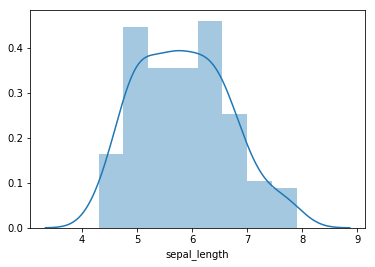

In [10]:
sns.distplot(df.sepal_length);

## <font color="red"> Q3: Create similar plots for the other three numeric variables in the dataset. In a couple of sentences, describe each of the plots. (1 point) </font>

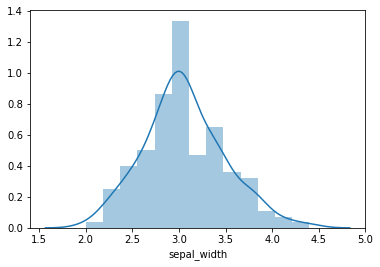

In [11]:
sns.distplot(df.sepal_width); # semi colon supresses this ugly line

This graph seems to be fairly normally distributed.

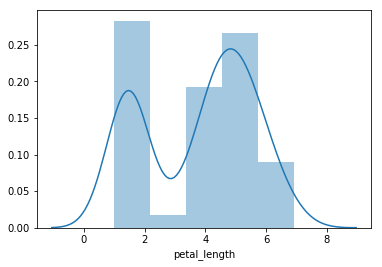

In [13]:
sns.distplot(df.petal_length);

It's hard for me to tell if this counts as bimodal or not. I wouldn't say it's normal, that's for sure.

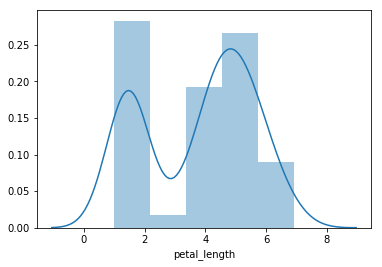

In [14]:
sns.distplot(df.petal_length);

This graph is very similar to the other petatl graph. Probably bimodal or multimodal.

We often want to see how variables vary with each other.  We'll get into the details 
in a few classes, but for now let's examine them visually.  In seaborn, we do this using 
the jointplot(). So, for example, if we wanted to look at the relationship between the
distributions of sepal_length and sepal_width, we could do something like:



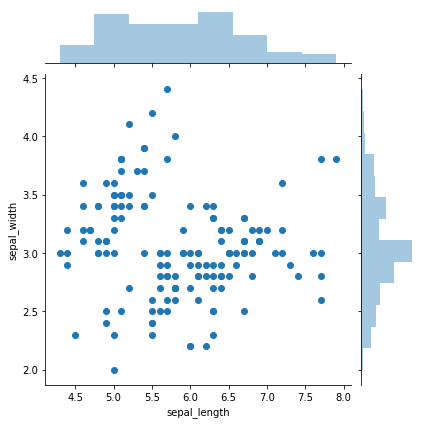

In [15]:
sns.jointplot(x='sepal_length',y='sepal_width',data=df)

## <font color="red"> Q4: It's a bit difficult to see where the interesting areas in the plot are, so it's worth trying a hexbin plot.  Go ahead and copy the above  code block and add ```kind="hex"``` to the jointplot parameters. In a couple of sentences, describe what stands out to you about the visualization. (1 points) </font>

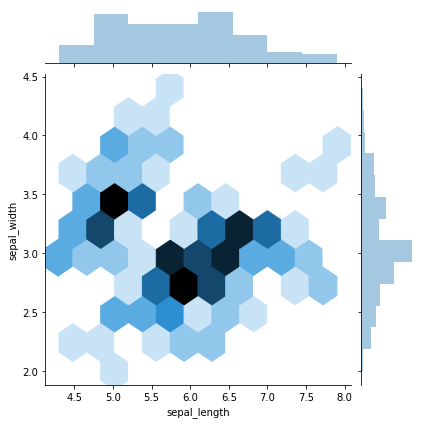

In [16]:
sns.jointplot(x='sepal_length',y='sepal_width',data=df, kind ='hex')

Woah this changed it a lot. Now it's hexagons that define a certain area, and the darker the hex is, the more points fall in that hex.

Now, take a look at what happens when you set ```kind="kde"```

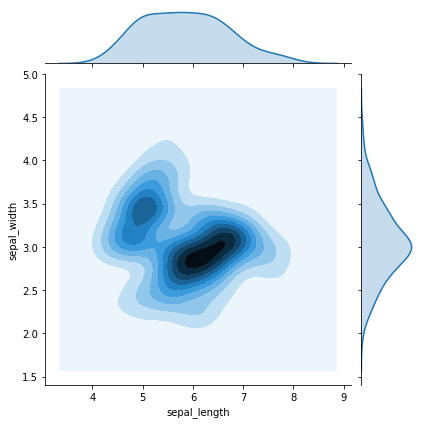

In [17]:
sns.jointplot(x='sepal_length',y='sepal_width',data=df,kind="kde")

Finally, you may want to look at all the numeric variables in your
dataset. Use ```pairplot``` to do this:


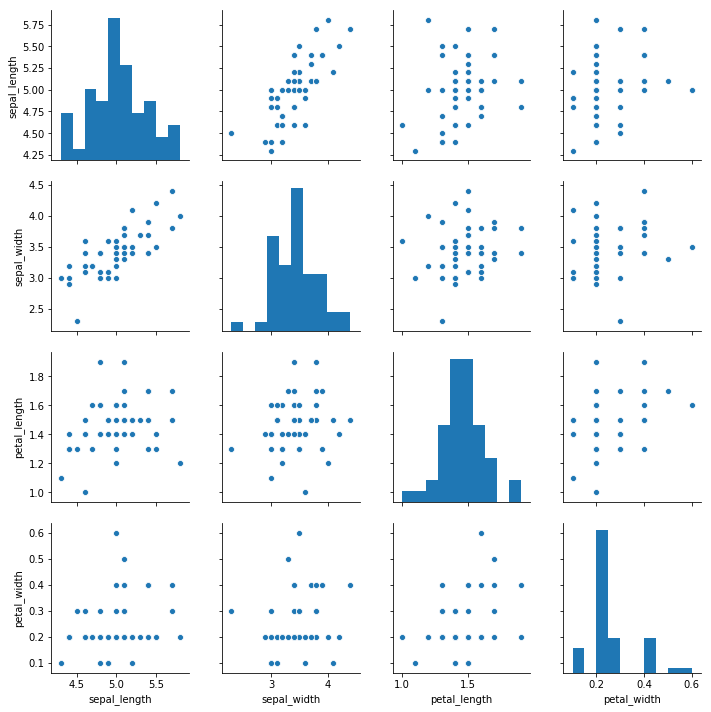

In [18]:
sns.pairplot(df.query("species == 'setosa'"))

We can get fancier by using a different column to set the color (or "hue"):

Try running the following code:

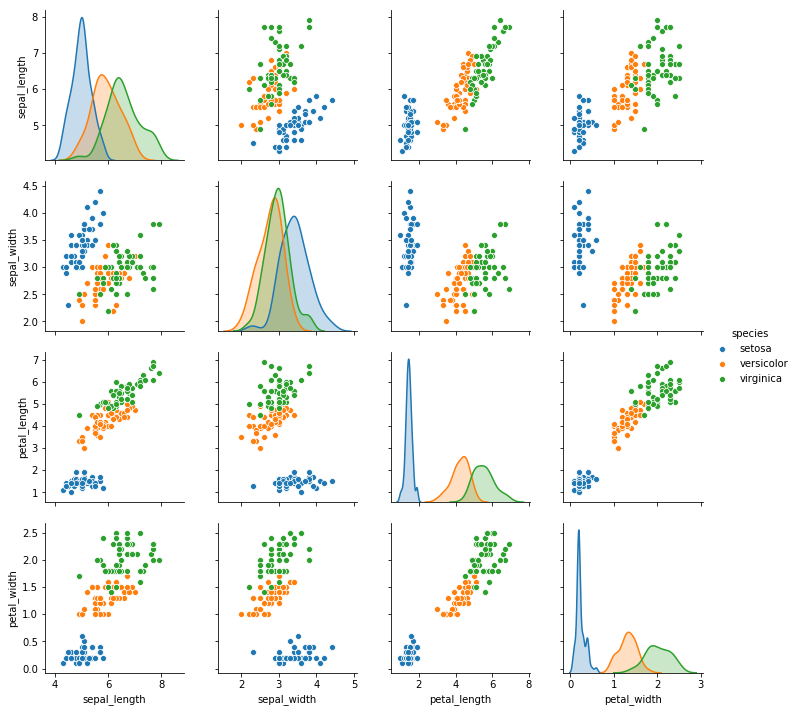

In [19]:
sns.pairplot(df,hue="species")

## Part 2: Wine quality
![](resources/vinho.png)
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/home

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
wine = pd.read_csv('data/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine['good'] = np.where(wine['quality'] > 5, 'good','bad')

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


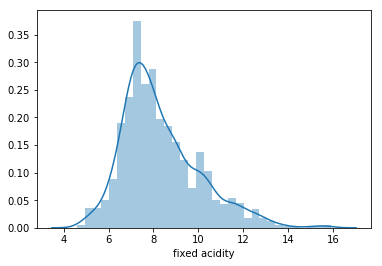

In [6]:
sns.distplot(wine['fixed acidity'])

## Q5: Create a pairplot for the wine dataset that plots 'good' and 'bad' wines in different hues. In a couple of sentences, describe interesting relationships shown by the visualization.  (2 points)

In [8]:
sns.pairplot(wine,hue="good")

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f15da18e378> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f15da19bc80> (for post_execute):


KeyboardInterrupt: 

## Part 3:  Airplane Crashes and Fatalities
The next dataset we are going to look at is the full history of airplane crashes throughout the world, from 1908-2009.  It's taken from:

https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq

In [9]:
import pandas as pd
import seaborn as sns

We've provided the CSV file for this lab so you can go ahead and load it in the usual way:

In [10]:
crashes = pd.read_csv('data/Airplane_Crashes_and_Fatalities_Since_1908.csv')

As always, you should take a look at the data to get a sense of 
what it's like:

In [11]:
crashes.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


As we mentioned in an earlier class, pandas is really good at helping
us deal with dates.  The 'Date' column in the dataframe contains 
strings that look like dates.  We can use the ```pandas.to_datetime()``` function to convert the strings to an internal datetime object
(see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html for more details):

In [12]:
crashes['Date'] = pd.to_datetime(crashes['Date'])

And let's look at the dataframe again.  See any difference?

In [13]:
crashes.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


The pandas datetime object makes it easy to extract interesting 
parts of the date or time.  In our case, we're interested in extracting
the year, so we can do that with the following code:

In [14]:
crashes['year'] = crashes['Date'].dt.year

And, as always, let's look at what we got:

In [15]:
crashes.year.head()

0    1908
1    1912
2    1913
3    1913
4    1913
Name: year, dtype: int64

As part of the final exercise in this class, let's create a 
visualization of the number of Fatalities per year:

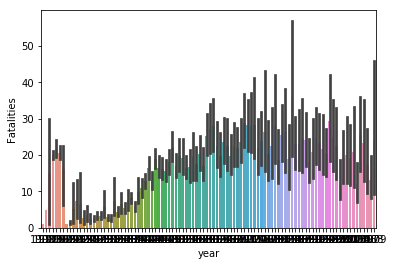

In [16]:
sns.barplot('year','Fatalities',data=crashes)

That doesn't look great, does it?  


## Q6: Create a barplot of the number of fatalities per decade and describe the results.  (1 point)

Go ahead and create a new column called 'decade' 
that represents the decade for each year.  Remember that an integer divide (a.k.a. a floor divide) can be
done with the // operator.

What's the trend in airplane crash fatalities?

In [22]:
crashes['decade'] = (crashes['year']//10) * 10

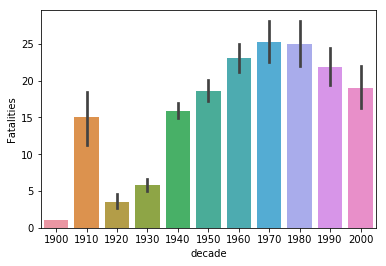

In [23]:
sns.barplot('decade','Fatalities',data=crashes)

It seems that overall fatalities have gone up, but then come back down. I want to know what happened in 1910 with plane crashes.

## Part 4 (FYI): Functional Magnetic Resonance Imagining
![](resources/fmri.png)

In [24]:
fmri = sns.load_dataset("fmri")

In [25]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [26]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


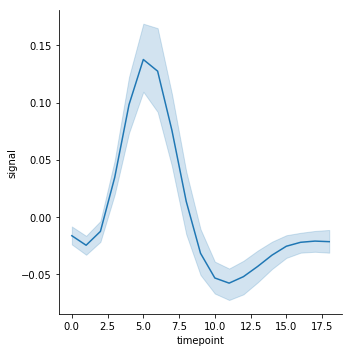

In [27]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

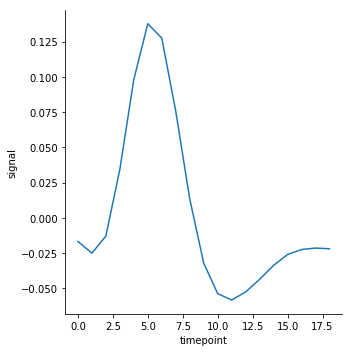

In [28]:
sns.relplot(x="timepoint", y="signal", kind="line", ci=None, data=fmri);

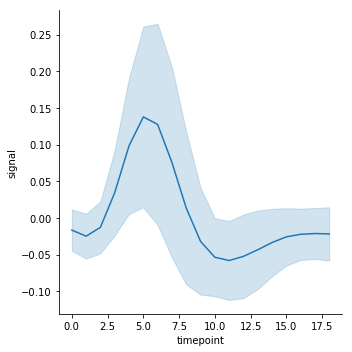

In [29]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd",data=fmri);

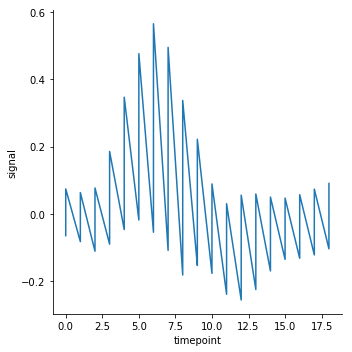

In [30]:
sns.relplot(x="timepoint", y="signal", kind="line", estimator=None, data=fmri);

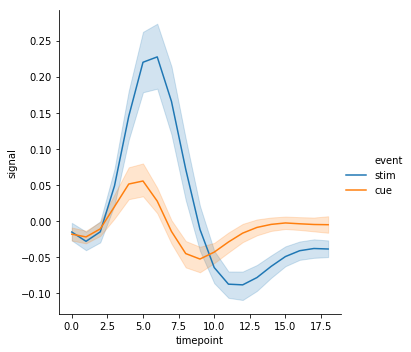

In [31]:
sns.relplot(x = "timepoint", y = "signal", kind = "line", data = fmri, hue = "event");

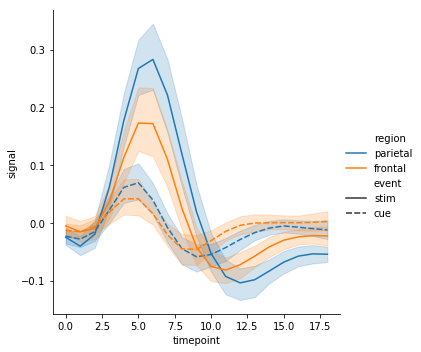

In [32]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, hue="region", style="event");

Kelsey Toporski, ktops